## Linear regression allows us to make predictions based on past data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('USA_Housing.csv')



In [3]:
import seaborn as sns

In [4]:
# show column names

data.columns


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [12]:
# rename columns

data.rename(columns={
    'Avg. Area Income': 'median_income', 
    'Avg. Area House Age': 'house_age', 
    'Avg. Area Number of Rooms': 'number_of_rooms', 
    'Avg. Area Number of Bedrooms': 'number_of_bedrooms', 
    'Price': 'price'}, 
    inplace=True)

data.head()

,median_income,house_age,number_of_rooms,number_of_bedrooms,Area Population,price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_income       5000 non-null   float64
 1   house_age           5000 non-null   float64
 2   number_of_rooms     5000 non-null   float64
 3   number_of_bedrooms  5000 non-null   float64
 4   Area Population     5000 non-null   float64
 5   price               5000 non-null   float64
 6   Address             5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 312.5+ KB


In [14]:
data.describe()

,median_income,house_age,number_of_rooms,number_of_bedrooms,Area Population,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


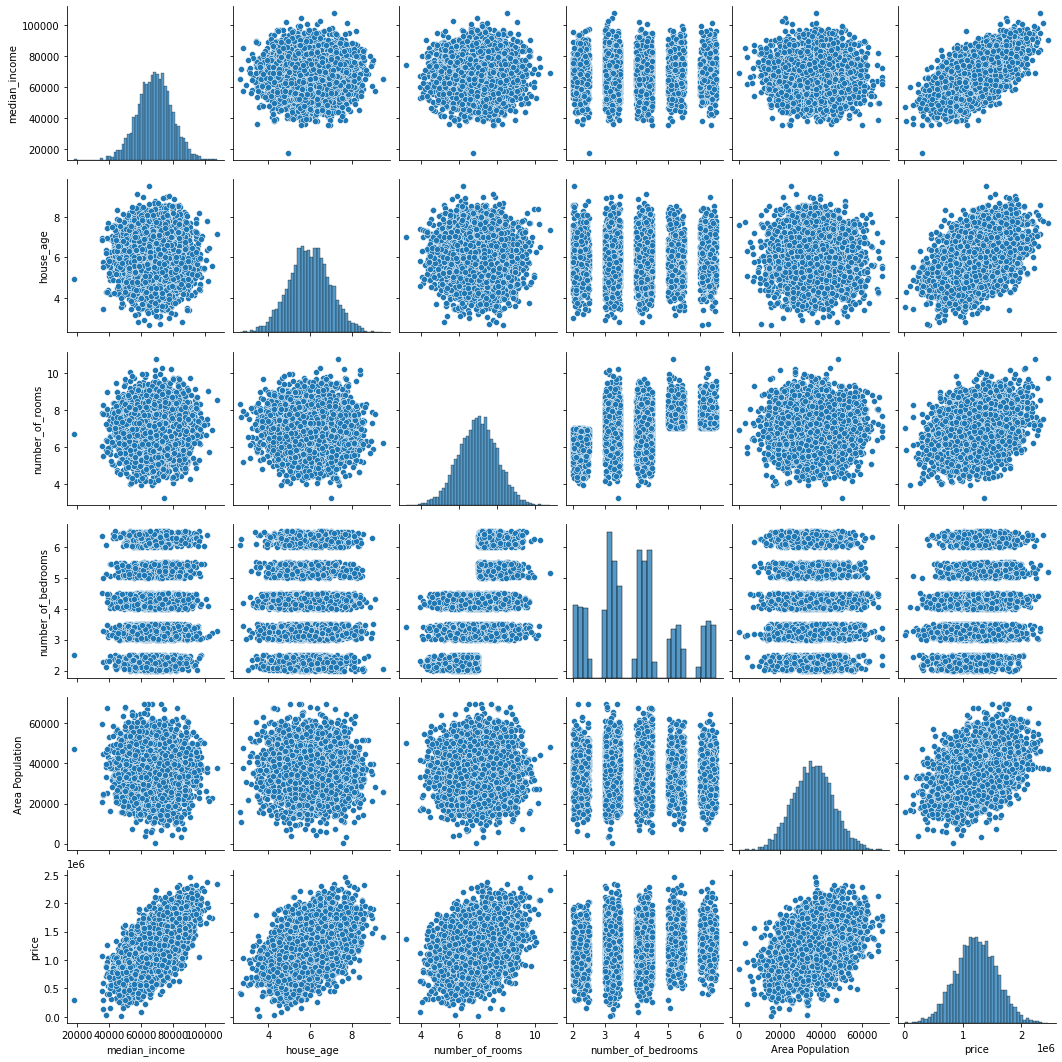

In [15]:
#pairplots for the columns

sns.pairplot(data)

<AxesSubplot:xlabel='price', ylabel='Density'>

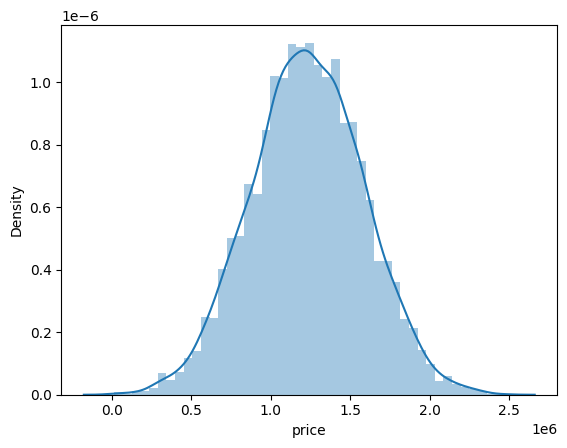

In [18]:
sns.distplot(data['price'])

<AxesSubplot:>

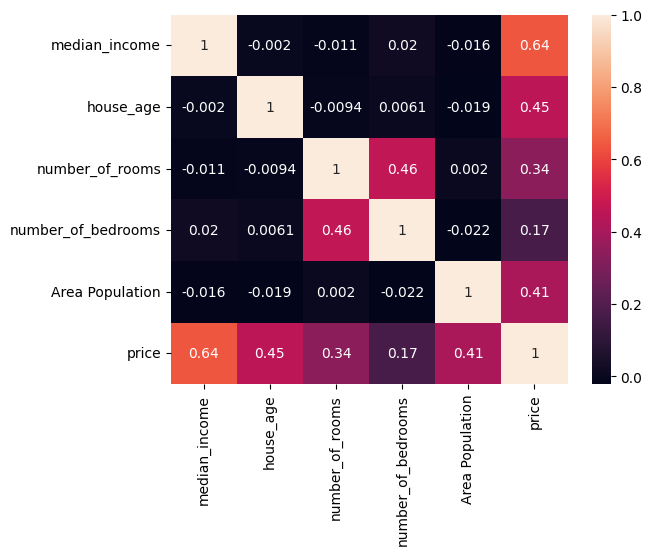

In [20]:
sns.heatmap(data.corr(), annot=True)

In [27]:
# When doing predictions...
# 1: Split the data set into features and target values. Features are the independent variables, and the target value is the y value.
# Use upper case X to show the features.

X = data[['median_income', 'house_age', 'number_of_bedrooms', 'number_of_rooms', 'Area Population']]

y = data['price']

In [28]:
# 2: Split into training and testing data sets
# one set for training and one set for testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)


In [29]:
#3: Import the linear regression model (class)

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

#4: Train the linear regression model on my training data

lm.fit(X_train, y_train)



LinearRegression()

In [30]:
# Check the intercept

lm.intercept_

-2640159.7968526664

In [31]:
# check the coefficients

lm.coef_

array([2.15282755e+01, 1.64883282e+05, 2.23380186e+03, 1.22368678e+05,
       1.51504200e+01])

In [32]:
# create a dataframe of coefficients

cdf = pd.DataFrame(lm.coef_, X_train.columns, columns=['coef'])

In [33]:
cdf

,coef
median_income,21.528276
house_age,164883.282027
number_of_bedrooms,2233.801864
number_of_rooms,122368.678027
Area Population,15.150420


In [34]:
predictions = lm.predict(X_test)

In [35]:
predictions

array([1260960.70567627,  827588.7556033 , 1742421.24254343, ...,
        372191.40626917, 1365217.15140898, 1914519.54178879])